In [27]:
import pandas as pd
import numpy as np
import io
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
import xgboost as xgb

In [14]:
data=pd.read_csv("../data/integration_b.csv",encoding="utf-8", index_col="Date")
data.head()


,Total Traffic Volume,Exchange Rate,Gross Domestic Product (GDP),Export growth rate,Import growth rate,Nationwide Consumer Price Index,Regular Unleaded Gasoline,Diesel Fuel for Automobiles,number of car ownership,Economic Growth Rate,Interest Rate Category,Export Price Category,Import Price Category
Date,,,,,,,,,,,,,
2011-01-01,5466446,1121.500000,328096.0,44.700000,13.600000,90.448000,1814.57,1611.14,18409608.0,High Growth,Low,Low,Medium
2011-01-02,5059821,1121.732258,328096.0,43.775943,13.521635,90.397806,1815.24,1611.79,18398782.0,High Growth,Low,Low,Medium
2011-01-03,5631394,1121.964516,328096.0,42.851885,13.443269,90.347613,1816.15,1612.85,18387956.0,High Growth,Low,Low,Medium
2011-01-04,5584995,1122.196774,328096.0,41.927828,13.364904,90.297419,1817.48,1614.02,18377130.0,High Growth,Low,Low,Medium
2011-01-05,5742955,1122.429032,328096.0,41.003771,13.286539,90.247226,1818.53,1615.00,18366304.0,High Growth,Low,Low,Medium


In [15]:
# Encoding Categorical Data (If needs)

# Economic Growth Rate
encoding_dict = {'High Growth':2, 'Moderate Growth':1, 'Low Growth':0.5, 'Negative Growth':-1}
data['Economic Growth Rate'] = data['Economic Growth Rate'].map(encoding_dict)

# Interest Rate Category
encoding_dict = {'Low':1, 'Moderate':2}
data['Interest Rate Category'] = data['Interest Rate Category'].map(encoding_dict)

# Export Price Category
encoding_dict = {'Low':1, 'Medium':1.5, 'High':2, 'Very High':2.5}
data['Export Price Category'] = data['Export Price Category'].map(encoding_dict)

data['Import Price Category'] = data['Import Price Category'].map(encoding_dict)

# Printout DataFrame After Encoding Categorical Data to Numerical
print(data.head(3))
print(data.info())

            Total Traffic Volume  Exchange Rate  Gross Domestic Product (GDP)  \
Date                                                                            
2011-01-01               5466446    1121.500000                      328096.0   
2011-01-02               5059821    1121.732258                      328096.0   
2011-01-03               5631394    1121.964516                      328096.0   

            Export growth rate  Import growth rate  \
Date                                                 
2011-01-01           44.700000           13.600000   
2011-01-02           43.775943           13.521635   
2011-01-03           42.851885           13.443269   

            Nationwide Consumer Price Index  Regular Unleaded Gasoline  \
Date                                                                     
2011-01-01                        90.448000                    1814.57   
2011-01-02                        90.397806                    1815.24   
2011-01-03                 

In [20]:
# 한 번만 실행
#df.drop(columns='date',inplace=True)
df=data
# Drop columns with low correlation
correlation_matrix = df.corr()
target_column = 'Total Traffic Volume'  # Assuming we are predicting Total Traffic Volume
correlation_threshold = 0.1

# Get columns with correlation higher than the threshold
high_corr_columns = correlation_matrix[abs(correlation_matrix[target_column]) > correlation_threshold].index
df_high_corr = df[high_corr_columns]

# Check for missing values in the dataframe
missing_values = df_high_corr.isnull().sum()

# Drop rows with missing values
df_high_corr_clean = df_high_corr.dropna()

# Binarize the target for simplicity (you can adjust this as per your requirement)
df_high_corr_clean['Total Traffic Volume'] = pd.cut(df_high_corr_clean['Total Traffic Volume'], bins=2, labels=[0, 1])

# Prepare the dataset for the decision tree classifier
X_class = df_high_corr_clean.drop(columns=['Total Traffic Volume'])
y_class = df_high_corr_clean['Total Traffic Volume']

In [21]:
# Split the dataset
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

In [33]:
# Train the decision tree classifier
XGB_classifier = XGBClassifier(random_state=42, max_depth=5)
XGB_classifier.fit(X_train_class, y_train_class)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [34]:
# Predict and evaluate
y_pred_class = XGB_classifier.predict(X_test_class)
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9078389830508474


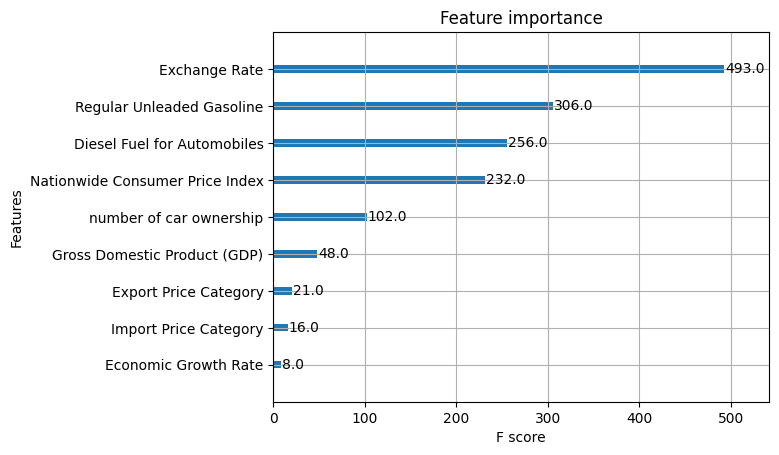

In [35]:
# Plot Importacne
xgb.plot_importance(XGB_classifier)
plt.show()

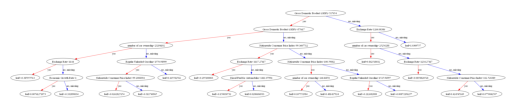

In [36]:
# Visualize the classifier
xgb.plot_tree(XGB_classifier, num_trees=0)
plt.show()